<a href="https://colab.research.google.com/github/singwang-cn/The_first_pattern_recognition/blob/master/advanced_ml_mid_assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [329]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv

# Problem 1

In [330]:
# dataset 4
n = 200
x_d4 = 3 * (np.random.rand(n, 4) - 0.5)
y_d4 = (2 * x_d4[:, 0] - 1 * x_d4[:,1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y_d4 = 2 * y_d4 -1

In [331]:
#X = np.column_stack((x_d4,np.ones((200, 1))))
X = x_d4[:,:-1]
Y = y_d4

In [332]:
def loss_func(X, Y, W, lamb):
  return np.log(1 + np.exp(-Y * np.dot(X, W))).sum() + lamb * np.dot(W, W)

In [333]:
def gradient(X, Y, W, lamb):
  ex = np.exp(-Y * np.dot(X, W))
  return np.dot(ex / (1+ex) * (-Y), X) + 2 * lamb * W

In [334]:
def hessian(X, Y, W, lamb):
  ex = np.exp(-Y * np.dot(X, W))
  z = np.sqrt(ex) * (1/(1+ex)) * Y
  X1 = np.expand_dims(z, 1).repeat(X.shape[1], axis=1) + X
  return np.dot(X1.T, X1) + 2 * lamb

In [335]:
loss_hist_batch = [] # to store the history of loss J(w_t)

# implement batch steepest gradient method here
W = np.random.rand(x_d4.shape[1]-1)
lamb = 0.5
lr = 0.002
for i in range(100):
  loss_hist_batch.append(loss_func(X, Y, W, lamb))
  W -= lr * gradient(X, Y, W, lamb)  

In [336]:
loss_hist_newton = [] # to store the history of loss J(w_t)

# implement Newton based method here
W = np.random.rand(x_d4.shape[1]-1)
lamb = 0.5
for i in range(100):
  loss_hist_newton.append(loss_func(X, Y, W, lamb))
  H = hessian(X, Y, W, lamb)
  g = gradient(X, Y, W, lamb)
  d = np.dot(g, np.linalg.inv(H))
  W -= d

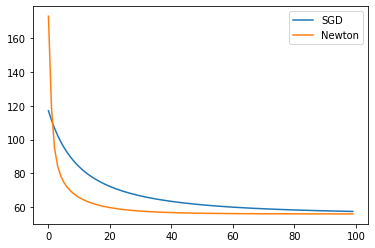

In [337]:
# plot the result
plt.plot(loss_hist_batch, label="SGD")
plt.plot(loss_hist_newton, label="Newton")
plt.legend()

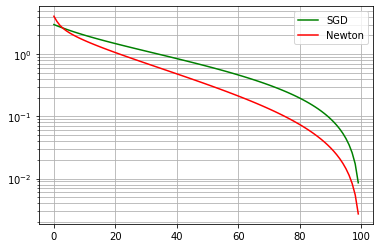

In [338]:
#SGD
w_list_sgd = []
W = np.random.rand(x_d4.shape[1]-1)
lamb = 0.5
lr = 0.002
for i in range(100):
  w_list_sgd.append(W.copy())
  W -= lr * gradient(X, Y, W, lamb)
diff_sgd = [np.linalg.norm(w-W, ord=2) for w in w_list_sgd]
#Newton
w_list_newton = []
W = np.random.rand(x_d4.shape[1]-1)
lamb = 0.5
for i in range(100):
  w_list_newton.append(W.copy())
  H = hessian(X, Y, W, lamb)
  g = gradient(X, Y, W, lamb)
  d = np.dot(g, np.linalg.inv(H))
  W -= d
diff_newton = [np.linalg.norm(w-W, ord=2) for w in w_list_newton]

#Semilog Plot
plt.grid(True, which="both")
plt.semilogy(diff_sgd, c='g', label="SGD")
plt.semilogy(diff_newton, c='r', label="Newton")
plt.legend()

In [339]:
# dataset 5
n = 200
x_d5 = 3 * (np.random.rand(n, 4) - 0.5)
W = np.array([[ 2,  -1, 0.5,],
              [-3,   2,   1,],
              [ 1,   2,   3]])
y_d5 = np.argmax(np.dot(np.hstack([x_d5[:,:2], np.ones((n, 1))]), W.T)
                        + 0.5 * np.random.randn(n, 3), axis=1)

In [355]:
X = x_d5[:,:-1]
Y = np.zeros((y_d5.size, y_d5.max()+1))
Y[np.arange(y_d5.size),y_d5] = 1

def softmax(X, W):
  ex = np.exp(np.dot(X, W.T))
  sig = ex.sum(axis=1)
  return ex / np.expand_dims(sig, 1).repeat(W.shape[1], axis=1)

def loss_func_mulc(X, Y, W, lamb):
  return -(Y*np.log(softmax(X, W))).sum() + lamb * np.trace(np.dot(W, W.T))

def gradient_mulc(X, Y, W, lamb):
  return np.dot((softmax(X, W)-Y).T, X) + 2*W

def hessian_mulc(X, Y, W, lamb):
  ex = np.exp(np.dot(X, W.T))
  sig = np.expand_dims(ex.sum(axis=1), 1).repeat(W.shape[1], axis=1)
  coe = (ex * (ex - sig) / sig**2)
  hess = []
  for i in range(W.shape[0]):
    hess.append(np.dot(X.T, X * np.expand_dims(coe[:,i], 1).repeat(W.shape[1], axis=1))+2*lamb)
  return np.array(hess)  

In [384]:
#SGD
loss_sgd = []
w_list_sgd = []
W_sgd = W.copy()
lamb = 0.5
lr = 0.002
for i in range(100):
  w_list_sgd.append(W_sgd.copy())
  loss_sgd.append(loss_func_mulc(X, Y, W_sgd, lamb))
  W_sgd -=  lr * gradient_mulc(X, Y, W_sgd, lamb)
diff_sgd = [np.linalg.norm(w-W_sgd, ord=2) for w in w_list_sgd]
#Newton
loss_newton = []
w_list_newton = []
W_newton = W.copy()
lamb = 0.5
lr = 0.5
for i in range(100):
  loss_newton.append(loss_func_mulc(X, Y, W_newton, lamb))
  w_list_newton.append(W_newton.copy())
  H = hessian_mulc(X, Y, W_newton, lamb)
  g = gradient_mulc(X, Y, W_newton, lamb)
  d = np.array([np.dot(g[i], np.linalg.inv(H[i])) for i in range(W.shape[0])])
  W_newton += lr * d
diff_newton = [np.linalg.norm(w-W_newton, ord=2) for w in w_list_newton]

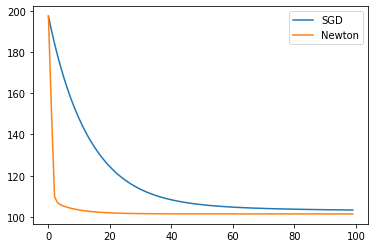

In [385]:
#visualization of loss
plt.plot(loss_sgd, label="SGD")
plt.plot(loss_newton, label="Newton")
plt.legend()

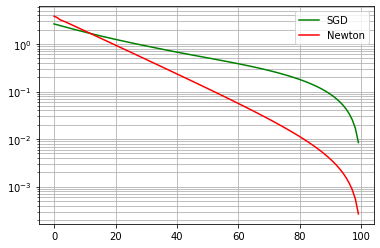

In [386]:
#Semilog Plot
plt.grid(True, which="both")
plt.semilogy(diff_sgd, c='g', label="SGD")
plt.semilogy(diff_newton, c='r', label="Newton")
plt.legend()